In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Student Mental health.csv")

In [4]:
df.head()

,Jenis Kelamin,Umur,Jurusan,Tahun Studi,IPK,Sudah Menikah?,Sedang Depresi?,Sedang Cemas?,Sedang Panik?,Sedang Menjalani Perawatan?,Stres Status
0,Perempuan,18,Teknik Mesin,1,"3,00 - 3,49",TIDAK,Ya,TIDAK,Ya,TIDAK,Ya
1,Pria,21,Pendidikan Agama Islam,2,"3,00 - 3,49",TIDAK,TIDAK,Ya,TIDAK,TIDAK,Ya
2,Pria,19,Fisika,1,"3,00 - 3,49",TIDAK,Ya,Ya,Ya,TIDAK,Ya
3,Perempuan,22,Hukum,3,"3,00 - 3,49",Ya,Ya,TIDAK,TIDAK,TIDAK,Ya
4,Pria,23,Matematika,4,"3,00 - 3,49",TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK


In [5]:
print(df.shape)

(225, 11)


In [6]:
df.columns

Index(['Jenis Kelamin', 'Umur', 'Jurusan', 'Tahun Studi', 'IPK',
       'Sudah Menikah?', 'Sedang Depresi?', 'Sedang Cemas?', 'Sedang Panik?',
       'Sedang Menjalani Perawatan?', 'Stres Status'],
      dtype='object')

In [7]:
df.describe()

,Umur,Tahun Studi
count,225.000000,225.000000
mean,20.493333,2.280000
std,2.066139,1.201487
min,18.000000,1.000000
25%,19.000000,1.000000
50%,20.000000,2.000000
75%,22.000000,3.000000
max,24.000000,6.000000


In [8]:
# age column is strange, look for outliers
df['Umur'].value_counts()

Umur
18    47
19    43
20    39
24    31
21    27
23    21
22    17
Name: count, dtype: int64

## Data Cleaning

In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

Jenis Kelamin                  0
Umur                           0
Jurusan                        0
Tahun Studi                    0
IPK                            0
Sudah Menikah?                 0
Sedang Depresi?                0
Sedang Cemas?                  0
Sedang Panik?                  0
Sedang Menjalani Perawatan?    0
Stres Status                   0
dtype: int64

Kami melihat satu baris memiliki nilai yang hilang sehingga solusi termudah adalah dengan menghilangkan baris tersebut seluruhnya

In [11]:
df.dropna(inplace=True)
df.isna().sum()

Jenis Kelamin                  0
Umur                           0
Jurusan                        0
Tahun Studi                    0
IPK                            0
Sudah Menikah?                 0
Sedang Depresi?                0
Sedang Cemas?                  0
Sedang Panik?                  0
Sedang Menjalani Perawatan?    0
Stres Status                   0
dtype: int64

In [12]:
columns_names = ['Jenis Kelamin', 'Umur', 'Jurusan', 'Tahun Studi', 'IPK',
       'Sudah Menikah?', 'Sedang Depresi?', 'Sedang Cemas?', 'Sedang Panik?',
       'Sedang Menjalani Perawatan?', 'Stres Status']
df.columns = columns_names
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 224
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Jenis Kelamin                188 non-null    object
 1   Umur                         188 non-null    int64 
 2   Jurusan                      188 non-null    object
 3   Tahun Studi                  188 non-null    int64 
 4   IPK                          188 non-null    object
 5   Sudah Menikah?               188 non-null    object
 6   Sedang Depresi?              188 non-null    object
 7   Sedang Cemas?                188 non-null    object
 8   Sedang Panik?                188 non-null    object
 9   Sedang Menjalani Perawatan?  188 non-null    object
 10  Stres Status                 188 non-null    object
dtypes: int64(2), object(9)
memory usage: 17.6+ KB


Penamaan setiap kolom terlalu panjang sehingga lebih mudah untuk mengganti nama menjadi nama yang lebih pendek dan deskriptif

**Umur**

In [13]:
df['Umur'].dtype
# dtype('float64')
df['Umur'] = df['Umur'].astype(int)
df['Umur'].dtype

dtype('int64')

**Tahun Studi**

In [14]:
df['Tahun Studi'].unique()

array([1, 2, 3, 4, 5, 6])

Kami menemukan metode terbaik bagi kami adalah mengubah kolom Tahun Studi menjadi tipe integer yang hanya berisi Tahun

**Kolom IPK**

In [16]:
df['IPK'].unique()

array(['3,00 - 3,49', '3,50 - 4,00', '2,50 - 2,99', '2,00 - 2,49',
       '0 - 1,99'], dtype=object)

Menghapus nilai-nilai berbeda yang disebabkan oleh spasi putih

**Students Conditions**

In [17]:
depressed_filter = df['Sedang Depresi?'] == 'Ya'
anxiety_filter = df['Sedang Cemas?'] == 'Ya'
panicking_filter = df['Sedang Panik?'] == 'Ya'
conditions_filter = anxiety_filter | depressed_filter | panicking_filter
no_conditions_filter = ~depressed_filter & ~anxiety_filter & ~panicking_filter

Setelah membuat beberapa filter, saya menambahkan kolom baru bernama Has Condition? untuk menunjukkan apakah seorang Siswa terpengaruh atau tidak oleh suatu kondisi.

In [18]:
df['Memiliki Kondisi?'] = np.where(conditions_filter, 'Ya',"TIDAK")
df

,Jenis Kelamin,Umur,Jurusan,Tahun Studi,IPK,Sudah Menikah?,Sedang Depresi?,Sedang Cemas?,Sedang Panik?,Sedang Menjalani Perawatan?,Stres Status,Memiliki Kondisi?
0,Perempuan,18,Teknik Mesin,1,"3,00 - 3,49",TIDAK,Ya,TIDAK,Ya,TIDAK,Ya,Ya
1,Pria,21,Pendidikan Agama Islam,2,"3,00 - 3,49",TIDAK,TIDAK,Ya,TIDAK,TIDAK,Ya,Ya
2,Pria,19,Fisika,1,"3,00 - 3,49",TIDAK,Ya,Ya,Ya,TIDAK,Ya,Ya
3,Perempuan,22,Hukum,3,"3,00 - 3,49",Ya,Ya,TIDAK,TIDAK,TIDAK,Ya,Ya
4,Pria,23,Matematika,4,"3,00 - 3,49",TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Perempuan,21,Ilmu Komputer,3,"3,00 - 3,49",TIDAK,Ya,TIDAK,Ya,Ya,Ya,Ya
221,Perempuan,20,Manajemen,2,"3,00 - 3,49",Ya,Ya,TIDAK,TIDAK,TIDAK,Ya,Ya
222,Pria,23,Biologi,4,"3,50 - 4,00",Ya,TIDAK,TIDAK,TIDAK,TIDAK,Ya,TIDAK
223,Pria,21,Teknik Elektro,3,"3,50 - 4,00",TIDAK,Ya,Ya,TIDAK,TIDAK,Ya,Ya


Membuat kolom baru bernama Kondisi.

Untuk setiap kondisi (Mengalami Depresi, Mengalami Kecemasan, atau Mengalami Serangan Panik) yang dialami siswa, sebuah huruf (A = Kecemasan, D = Depresi, dan P = Serangan Panik) ditambahkan ke kolom Kondisi sehingga memudahkan untuk melacak dan memfilter data.

In [19]:
df['Kondisi'] = ''
df.loc[anxiety_filter, 'Kondisi'] += 'A'
df.loc[depressed_filter, 'Kondisi'] += 'D'
df.loc[panicking_filter, 'Kondisi'] += 'P'
df.loc[no_conditions_filter, 'Kondisi'] += 'None'
# df['Condition'].unique()

df

,Jenis Kelamin,Umur,Jurusan,Tahun Studi,IPK,Sudah Menikah?,Sedang Depresi?,Sedang Cemas?,Sedang Panik?,Sedang Menjalani Perawatan?,Stres Status,Memiliki Kondisi?,Kondisi
0,Perempuan,18,Teknik Mesin,1,"3,00 - 3,49",TIDAK,Ya,TIDAK,Ya,TIDAK,Ya,Ya,DP
1,Pria,21,Pendidikan Agama Islam,2,"3,00 - 3,49",TIDAK,TIDAK,Ya,TIDAK,TIDAK,Ya,Ya,A
2,Pria,19,Fisika,1,"3,00 - 3,49",TIDAK,Ya,Ya,Ya,TIDAK,Ya,Ya,ADP
3,Perempuan,22,Hukum,3,"3,00 - 3,49",Ya,Ya,TIDAK,TIDAK,TIDAK,Ya,Ya,D
4,Pria,23,Matematika,4,"3,00 - 3,49",TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,TIDAK,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Perempuan,21,Ilmu Komputer,3,"3,00 - 3,49",TIDAK,Ya,TIDAK,Ya,Ya,Ya,Ya,DP
221,Perempuan,20,Manajemen,2,"3,00 - 3,49",Ya,Ya,TIDAK,TIDAK,TIDAK,Ya,Ya,D
222,Pria,23,Biologi,4,"3,50 - 4,00",Ya,TIDAK,TIDAK,TIDAK,TIDAK,Ya,TIDAK,None
223,Pria,21,Teknik Elektro,3,"3,50 - 4,00",TIDAK,Ya,Ya,TIDAK,TIDAK,Ya,Ya,AD


## Data Visualization

Distribusi Gender - Visualisasikan distribusi gender di kalangan siswa

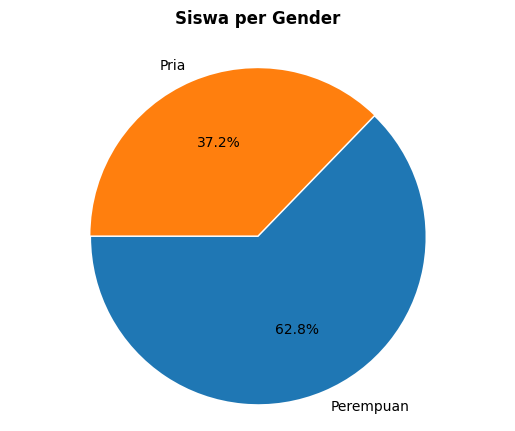

In [20]:
labels = df['Jenis Kelamin'].value_counts().index

plt.pie(df['Jenis Kelamin'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Siswa per Gender', fontsize=12, fontweight='bold', pad=20)
plt.show()

Siswa berdasarkan Tahun Studi

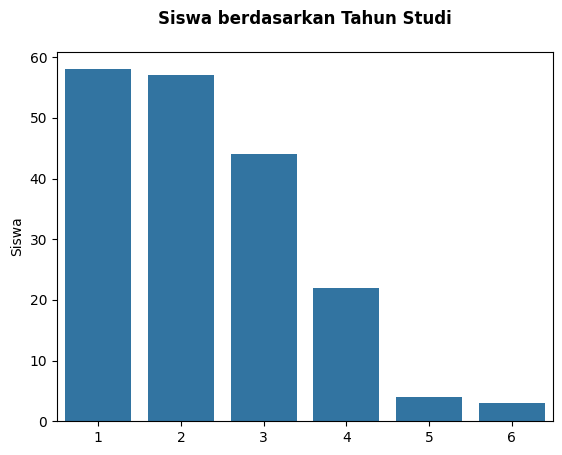

In [21]:
sns.countplot(data=df, x='Tahun Studi').set(xlabel=None, ylabel='Siswa')
plt.title('Siswa berdasarkan Tahun Studi', fontsize=12, fontweight='bold', pad=20)
sns.color_palette("pastel")

plt.show()

Siswa menurut IPK

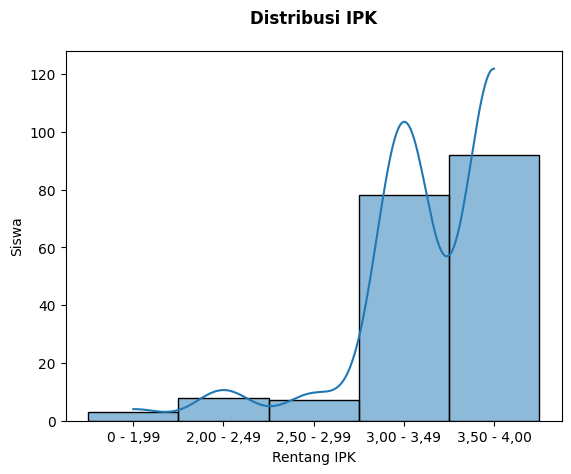

In [22]:
sns.histplot(df['IPK'].sort_values(), kde=True)
plt.xlabel('Rentang IPK')
plt.ylabel('Siswa')
plt.title('Distribusi IPK', fontsize=12, fontweight='bold', pad=20)
plt.show()

Siswa berdasarkan Usia

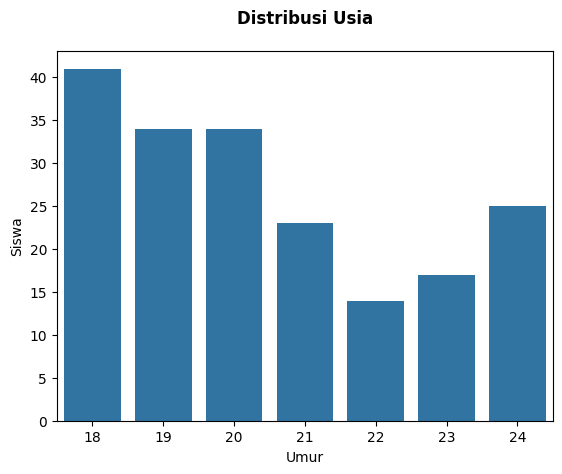

In [23]:
sns.countplot(data=df, x='Umur')
plt.xlabel('Umur')
plt.ylabel('Siswa')
plt.title('Distribusi Usia', fontsize=12, fontweight='bold', pad=20)

plt.show()

Analisis Awal

Dalam analisis awal tentang struktur dasar kumpulan data ini, kami telah memperhatikan lima pengamatan utama:

1. Jumlah orang pada usia 18 tahun adalah yang paling banyak, yaitu 40 orang.
2. Jumlah orang cenderung menurun seiring dengan peningkatan usia, dengan jumlah terkecil pada usia 22 tahun, yaitu 15 orang.
3. Selain usia 18 tahun, jumlah orang yang cukup banyak juga terlihat pada usia 19 tahun (35 orang) dan 20 tahun (34 orang).
4. Pada usia 21 tahun, jumlah orang menurun menjadi 25 orang.
5. Pada usia 22 tahun, jumlah orang kembali meningkat menjadi 18 orang.

Secara keseluruhan, dapat disimpulkan bahwa distribusi usia menunjukkan jumlah terbanyak pada usia 18 tahun, dengan kecenderungan menurun seiring bertambahnya usia, kecuali pada usia 22 tahun yang mengalami sedikit peningkatan.

**Exploratory Data Analysis**

In [24]:
df_condition = df[df['Memiliki Kondisi?'] == 'Ya']

Menemukan kondisi yang paling umum

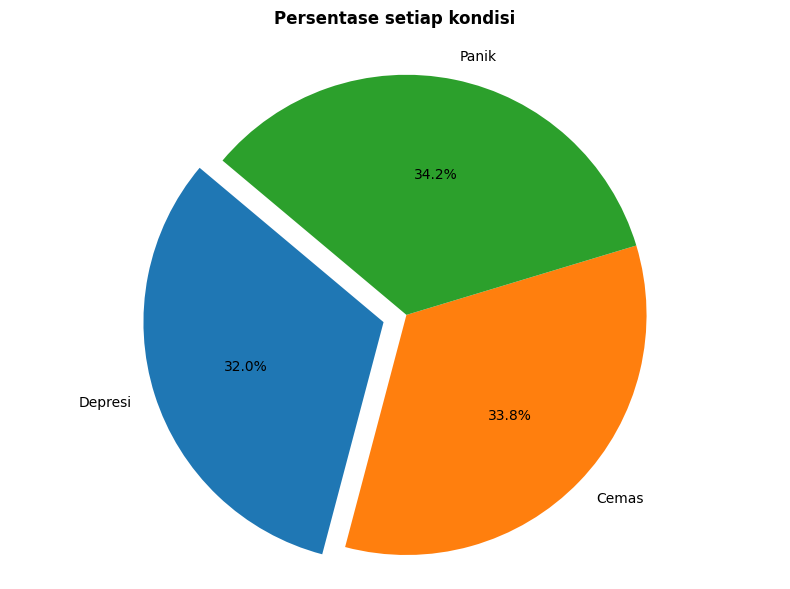

In [26]:
total_entries = len(df_condition)
persentase_depresi = (df_condition['Sedang Depresi?'].value_counts()['Ya'] / total_entries) * 100
persentase_cemas = (df_condition['Sedang Cemas?'].value_counts()['Ya'] / total_entries) * 100
persentase_panik = (df_condition['Sedang Panik?'].value_counts()['Ya'] / total_entries) * 100

# Create a pie chart
labels = ['Depresi', 'Cemas', 'Panik']
sizes = [persentase_depresi, persentase_cemas, persentase_panik]

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Persentase setiap kondisi', fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Berapa banyak orang dengan kondisi tertentu yang menjalani perawatan?

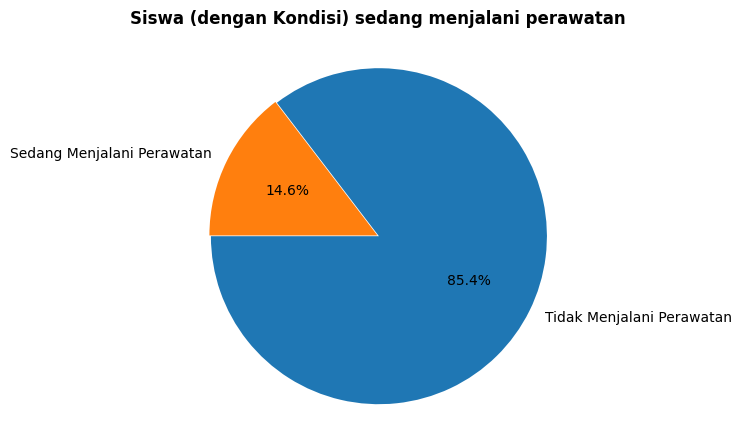

In [27]:
labels = ['Tidak Menjalani Perawatan', 'Sedang Menjalani Perawatan']
plt.pie(df_condition['Sedang Menjalani Perawatan?'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=180, explode=(0.005, 0.005))
plt.axis('equal')
plt.title('Siswa (dengan Kondisi) sedang menjalani perawatan', fontsize=12, fontweight='bold', pad=20)
plt.show()

In [28]:
sorted_conditions = df_condition['Kondisi'].value_counts().index.tolist()

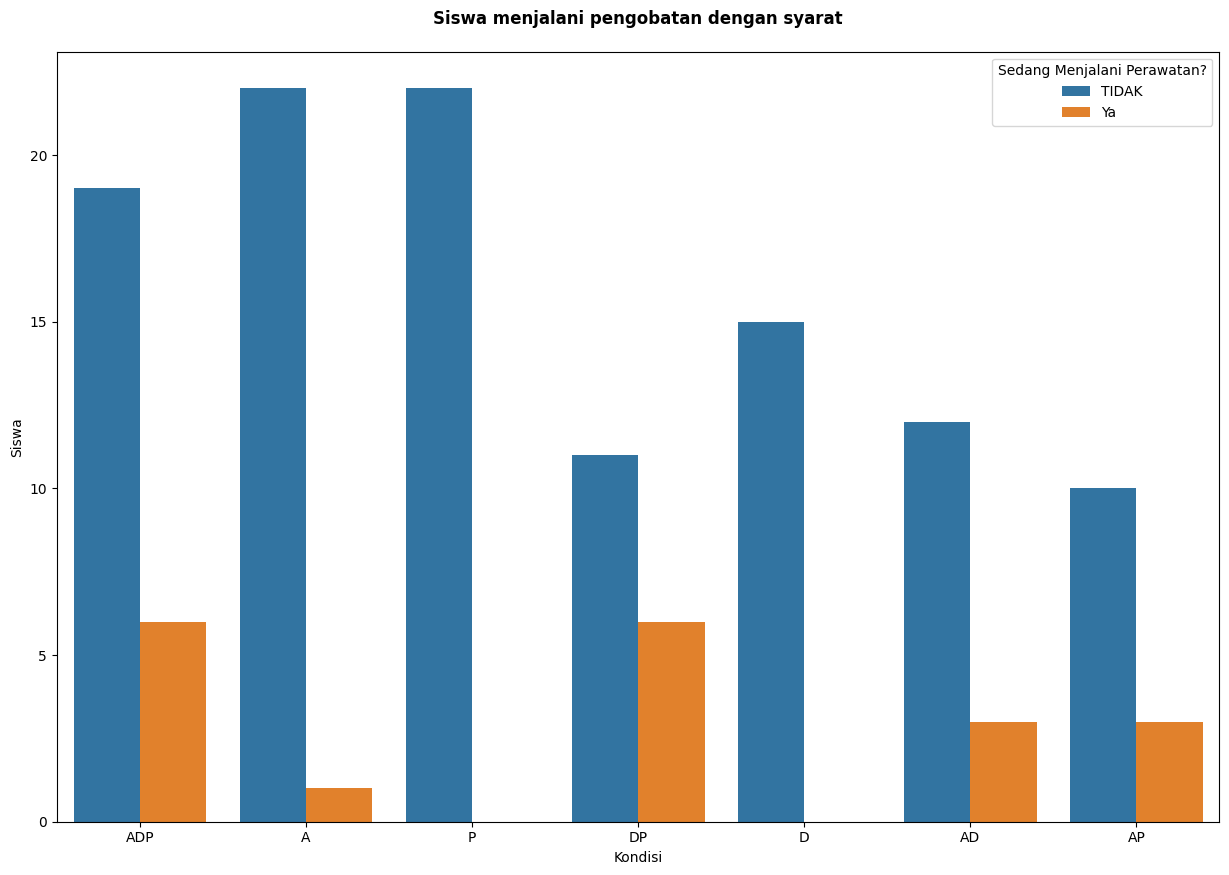

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_condition, x='Kondisi', hue='Sedang Menjalani Perawatan?', order=sorted_conditions)

plt.xlabel('Kondisi')
plt.ylabel('Siswa')
plt.title('Siswa menjalani pengobatan dengan syarat', fontsize=12, fontweight='bold', pad=20)
plt.show()

Setelah menganalisis kumpulan data, kami mengamati bahwa sekitar 1 dari 10 siswa menjalani pengobatan. Menariknya, temuan kami menunjukkan bahwa siswa dengan kondisi D (yang diduga terkait depresi) memiliki jumlah yang paling sedikit, yaitu hanya sekitar 8 siswa

**Conditions By Gender**

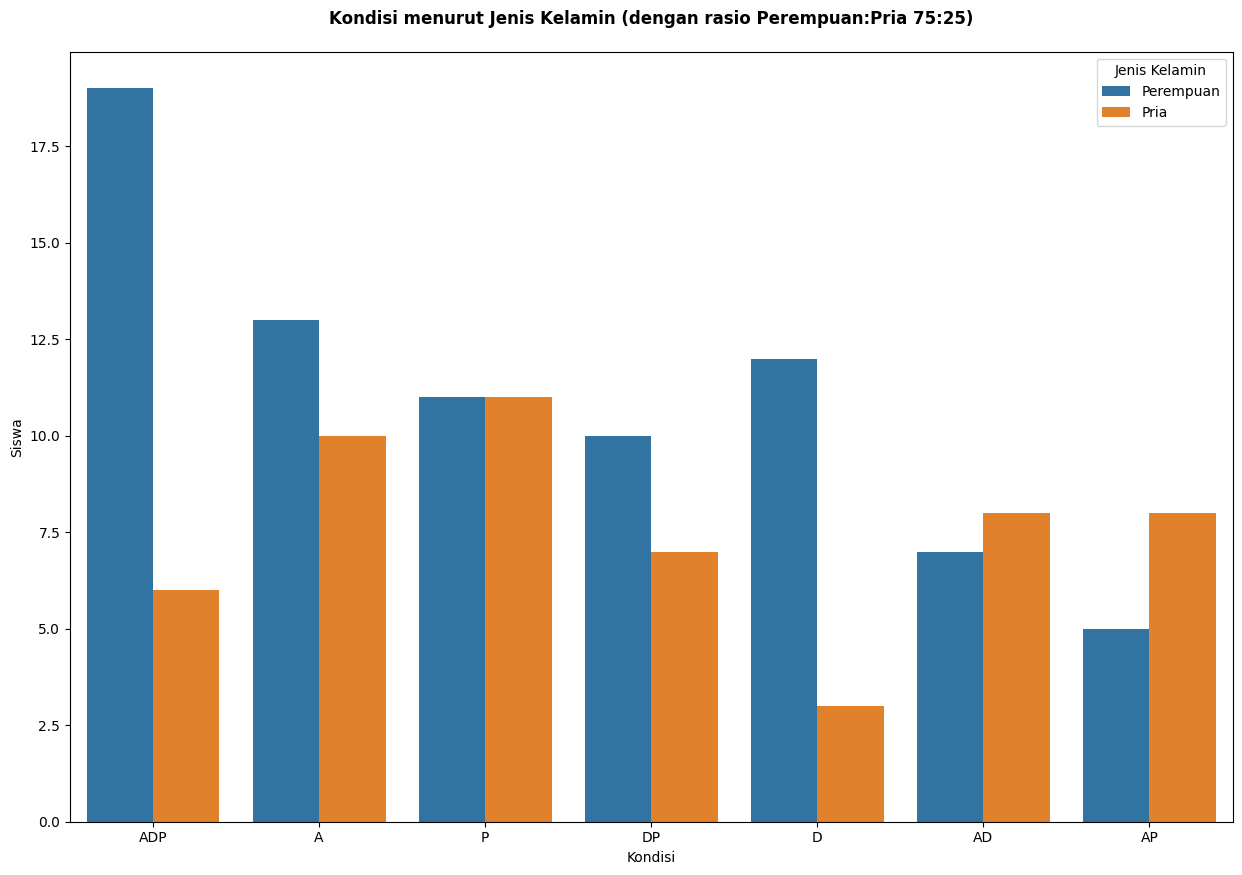

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_condition, x='Kondisi', hue='Jenis Kelamin', order=sorted_conditions)

plt.xlabel('Kondisi')
plt.ylabel('Siswa')
plt.title('Kondisi menurut Jenis Kelamin (dengan rasio Perempuan:Pria 75:25)', fontsize=12, fontweight='bold', pad=20)
plt.show()

In [31]:
# Menghitung rasio gender
gender_ratio = df_condition['Jenis Kelamin'].value_counts(normalize=True)

# Menghitung jumlah kondisi berdasarkan gender
grouped = df_condition.groupby(['Kondisi', 'Jenis Kelamin']).size().reset_index(name='Count')
grouped = grouped.merge(gender_ratio.rename('Gender Ratio'), left_on='Jenis Kelamin', right_index=True)

# Normalisasi jumlah kondisi berdasarkan rasio gender
grouped['Count'] = grouped['Count'] / grouped['Gender Ratio']

# Pivot data untuk membuat dataframe dengan kondisi sebagai baris dan gender sebagai kolom
condition_gender_df = grouped.pivot(index='Kondisi', columns='Jenis Kelamin', values='Count').reset_index()
condition_gender_df.fillna(0, inplace=True)
condition_gender_df.columns = ['Kondisi', 'Pria', 'Perempuan']

# Menambahkan kolom total
condition_gender_df['Total'] = condition_gender_df['Pria'] + condition_gender_df['Perempuan']

# Menyortir dataframe berdasarkan total
condition_gender_df = condition_gender_df.round(2).sort_values('Total', ascending=False)

print(condition_gender_df)

  Kondisi   Pria  Perempuan  Total
2     ADP  32.08      14.72  46.79
0       A  21.95      24.53  46.48
6       P  18.57      26.98  45.55
5      DP  16.88      17.17  34.05
1      AD  11.82      19.62  31.44
3      AP   8.44      19.62  28.06
4       D  20.26       7.36  27.62


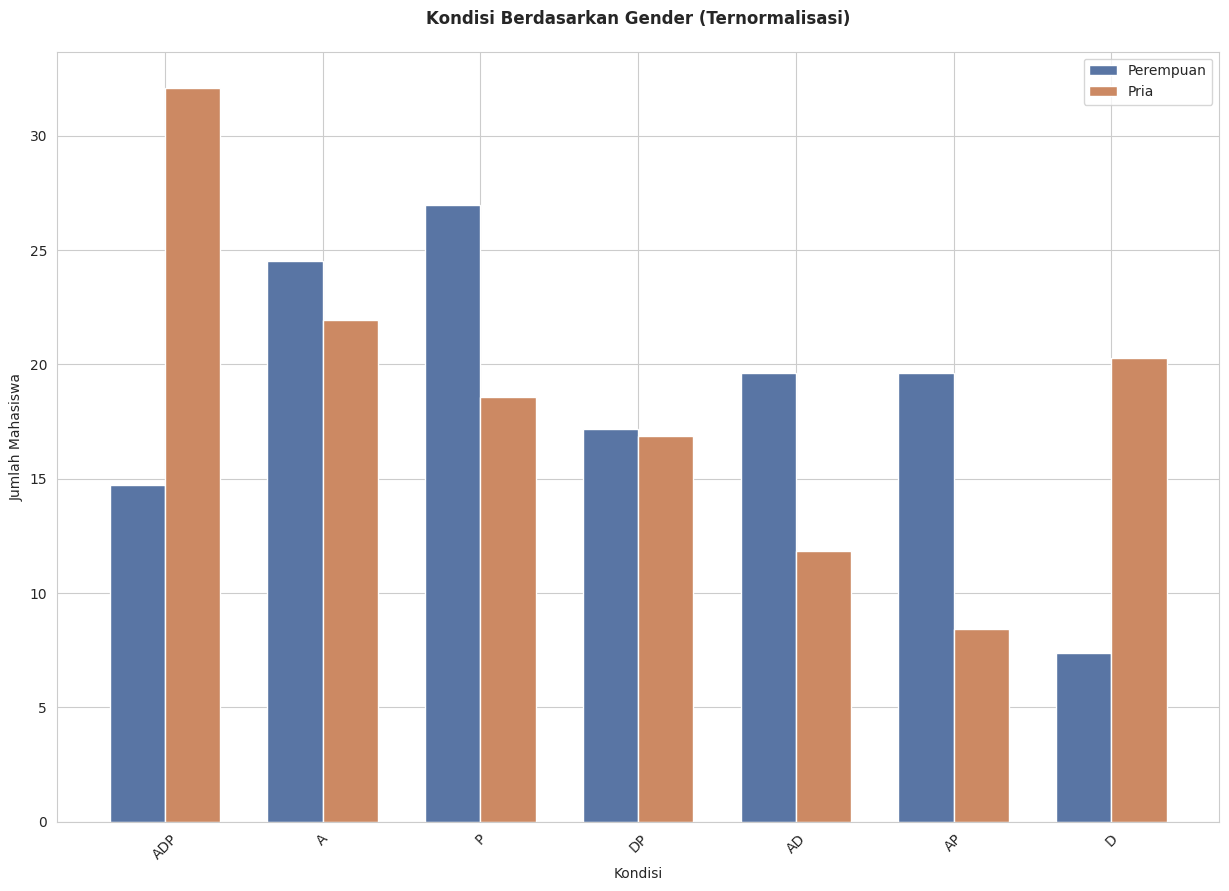

In [32]:
plt.figure(figsize=(15,10))
bar_width = 0.35

condition_indices = np.arange(len(condition_gender_df))

sns.set_style("whitegrid")

plt.bar(condition_indices, condition_gender_df['Perempuan'], width=bar_width, color='#5975a4', label='Perempuan')
plt.bar(condition_indices + bar_width, condition_gender_df['Pria'], width=bar_width, color='#cc8963', label='Pria')

plt.xticks(condition_indices + bar_width / 2, condition_gender_df['Kondisi'], rotation=45)

plt.xlabel('Kondisi')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Kondisi Berdasarkan Gender (Ternormalisasi)', fontsize=12, fontweight='bold', pad=20)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

1. Untuk kondisi ADP, jumlah siswa perempuan jauh lebih banyak dibandingkan siswa laki-laki.
2. Pada kondisi A, siswa perempuan juga memiliki jumlah yang lebih tinggi daripada siswa laki-laki.
3. Untuk kondisi P, terdapat perbedaan yang cukup besar antara jumlah siswa perempuan dan laki-laki, dengan siswa perempuan jauh lebih banyak.
4. Pada kondisi DP, meskipun selisihnya tidak terlalu besar, jumlah siswa perempuan masih sedikit lebih banyak dibandingkan siswa laki-laki.
5. Untuk kondisi D, jumlah siswa laki-laki dan perempuan relatif seimbang.
6. Pada kondisi AD, jumlah siswa laki-laki sedikit lebih banyak daripada siswa perempuan.

Secara keseluruhan, data ini menunjukkan adanya perbedaan signifikan dalam distribusi kondisi berdasarkan gender, dengan siswa perempuan cenderung lebih banyak muncul pada beberapa kondisi tertentu.